# Model Creation

In this notebook we will load our preprocessed data which we have done in our previous part and now we will train the model on various linear regression algorithms

## Step 1: Import all the required libraries 

* __NumPy__ : NumPy is a Python library designed to manipulate arrays. It has built-in functions that can perform quick operations on arrays and matrixes, Very useful for linear algebra and machine learning.

* __Pandas__ : Pandas is a Python library designed data manipulation and analysis using the numpy library. In particular, it offers data structures and functions for handling tables and time series
* __Seaborn__ : Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
* __matplotlib__ :  Matplotlib is a python library built for eassy visualisation. It is built on NumPy arrays and consists of several plots like line, bar, scatter, histogram, etc.
* __sklearn__ : A great machine learning library for python with built-in functions and method and algorithms useful for creating, training and testing various machine learning models.

In [78]:
#Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [79]:
# Read preprocessed csv file
df = pd.read_csv('./data/TSLA_preprocessed.csv', index_col=0)# use index_cols to set dates as index

In [80]:
# View first 5 rows
df.head()

,Open,Close,Volume,Target
Date,,,,
2010-07-01,1.666667,1.464000,123282000,1.280000
2010-07-02,1.533333,1.280000,77097000,1.074000
2010-07-06,1.333333,1.074000,103003500,1.053333
2010-07-07,1.093333,1.053333,103825500,1.164000
2010-07-08,1.076000,1.164000,115671000,1.160000


## Step 2: Data Preparation

### Goal:- 
1. Spearate the target variable and feature columns in two different dataframe and check the shape of the dataset for validation purpose.
2. Split dataset into train and test dataset


#### 1. Seperate the target variable and feature columns in two different dataframe and check the shape of the dataset for validation purpose.

In [81]:
#Create 2 DataFrame, X: Input variables y: Target variable
X = df.drop(['Target'], axis=1)#Set X as every column except 'Target'
y = df['Target']#Set y as 'Target' Column

Let's check the shape to confirm we have them set up properly

In [82]:
X.shape, y.shape

((3084, 3), (3084,))

The y.shape is a tuple with no columns apparently, but this is just how pandas shows the **shape of a series**.

If we print the y DataFrame we can see its of desired shape

In [83]:
#visually checking the shape of target matrix
y.head()

Date
2010-07-01    1.280000
2010-07-02    1.074000
2010-07-06    1.053333
2010-07-07    1.164000
2010-07-08    1.160000
Name: Target, dtype: float64

As we can see it is proper

#### 2. Split dataset into train and test dataset

Here we are spliting our dataset into 80/20 percentage where 80% dataset goes into the training and 20% goes into testing the part.

In [84]:
# Splitting the X and y Dataframe into X_train, y_train, X_test, y_test variables with 80-20 split respectively.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

In [85]:
# Check shape of the new dataframes
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2467, 3), (617, 3), (2467,), (617,))

## Step 3: Model Training

### Goal:- In this step we are going to train our dataset on different regression algorithms. As we know that our target variable is in continous format so we have to apply regression algorithms.

#### Define Cross-validation folds
If we just train on the training and testing sets we can't confidently say that our model has learnt. For this purpose we Train it on a subset of the data and then consecutively test it on a complementary subset of data. For this we use K-Fold Cross validation technique

In [86]:
# Defining a kfold with 10 split
cross_val = KFold(n_splits=10, shuffle=True, random_state=69)#Setting shuffle to true to increase randomness of data selected

### 1. Linear Regression 
The most simple type of regression, where we try to fit our data on a line

#### Train set cross-validation

In [87]:
# defining linear regression model and creating its object
lin_reg = LinearRegression()

In [88]:
# fitting our model to the training dataset
lr = lin_reg.fit(X_train, y_train)

In [89]:
# Get R2 score
lr.score(X_train, y_train)

0.9979555102842111

In [90]:
# get metric values of kfold using negative RMSE
lr_scores = -1 * cross_val_score(lr,X_train,y_train,cv=cross_val,scoring='neg_root_mean_squared_error')
lr_scores

array([3.91318568, 3.83869048, 5.33597337, 4.61909726, 3.88373667,
       4.94811519, 3.66922423, 4.50099276, 3.61600041, 3.82669303])

In [91]:
# taking mean of the kfold scores
lr_score_train = np.mean(lr_scores)
lr_score_train

4.215170907890135

#### Predict

In [92]:
# predict the values on X_test dataset 
y_predicted = lin_reg.predict(X_test)


In [93]:
# RMSE between y_test and y_predicted values
lr_score_test = mean_squared_error(y_test, y_predicted, squared=False) # setting squared to False to get RMSE
lr_score_test

4.630059170123147

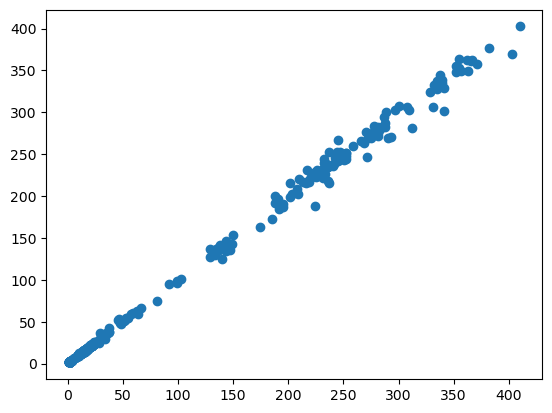

In [94]:
# scatter plot between y_test and y_predicted values
plt.scatter(y_test, y_predicted)
plt.show()

A straight line means our model is fitted very well

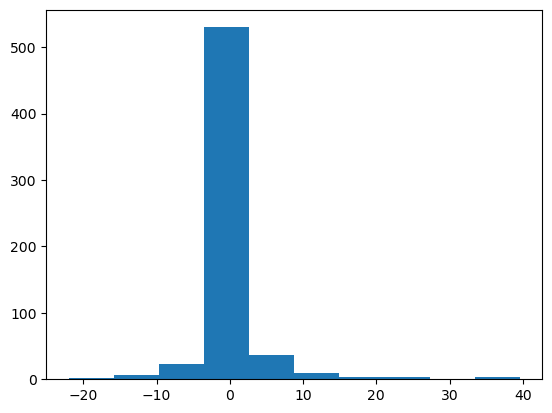

In [95]:
# histogram of y_test - y_predicted 
plt.hist(y_test - y_predicted)
plt.show()

Lots of zero means our model is predicting accurately

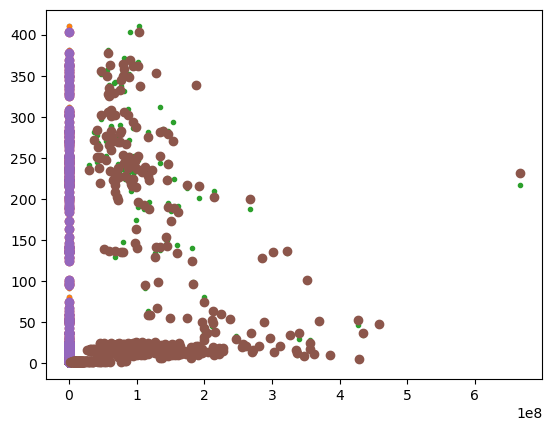

In [96]:
# fit graph for y_test vs y_predicted 
plt.plot(X_test, y_test,'.')
plt.plot(X_test, y_predicted,'o')
plt.show()

### 2. Lasso Regression
This uses regularization technique to minimise error

#### Train set cross-validation

In [97]:
# defining Lasso regression model and creating its object
lasso_reg = LassoCV()

In [98]:
# fitting our model to the training dataset
lasso_reg = lasso_reg.fit(X_train, y_train)

In [99]:
# Get R2 score
lasso_reg.score(X_train, y_train)

0.0029190950825591644

In [100]:
# get kfold values
lasso_scores = -1 * cross_val_score(lasso_reg,X_train,y_train,cv=cross_val,scoring='neg_root_mean_squared_error')
lasso_scores

array([ 92.18451382,  92.60574454, 105.2131609 ,  92.58079044,
        88.57111696,  86.42799083,  97.03689771,  94.54733869,
        93.60324893,  87.41475156])

In [101]:
# taking mean of the kfold scores
lasso_score_train = np.mean(lasso_scores)
lasso_score_train

93.0185554369767

#### Predict

In [102]:
# predict the values on X_test dataset 
y_predicted = lasso_reg.predict(X_test)


In [103]:
# RMSE between y_test and y_predicted values
lasso_score_test = mean_squared_error(y_test, y_predicted, squared=False)# setting squared to False to get RMSE
lasso_score_test

99.16026037830292

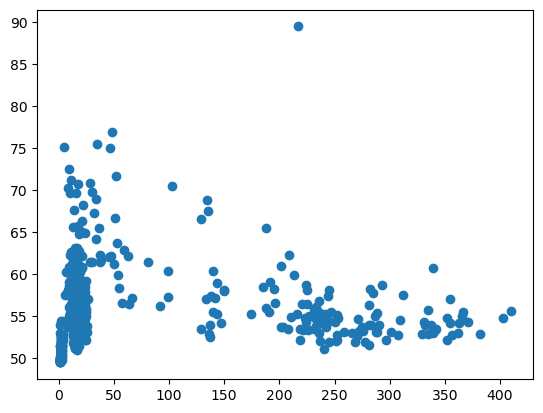

In [104]:
# scatter plot between y_test and y_predicted values
plt.scatter(y_test, y_predicted)
plt.show()

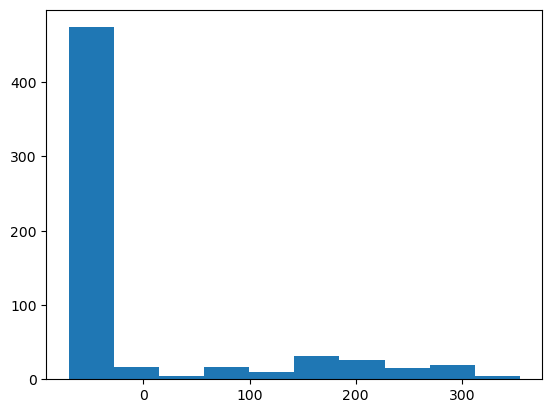

In [105]:
# histogram of y_test - y_predicted values
plt.hist(y_test - y_predicted)
plt.show()

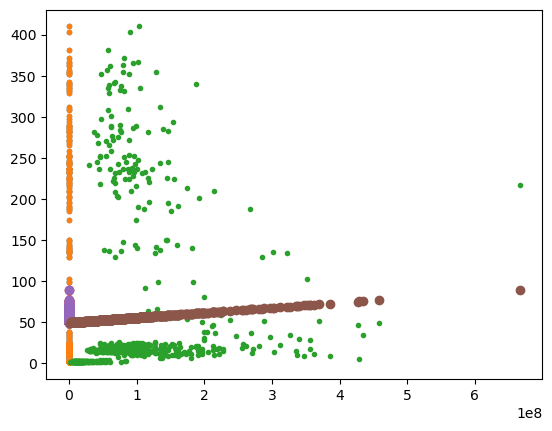

In [106]:
# fit graph for y_test vs y_predicted 
plt.plot(X_test, y_test,'.')
plt.plot(X_test, y_predicted,'o')
plt.show()

### 3. Ridge Regression
This uses L2 regularization to minimise error

#### Train set cross-validation

In [107]:
# defining Ridge regression model and creating its object
ridge_reg = RidgeCV()

In [108]:
#Fitting model to training data
ridge_reg = ridge_reg.fit(X_train, y_train)

In [109]:
# Get R2 score
ridge_reg.score(X_train, y_train)

-123.10472176044254

In [110]:
# get kfold values
ridge_scores = -1 * cross_val_score(ridge_reg,X_train,y_train,cv=cross_val,scoring='neg_root_mean_squared_error')
ridge_scores

array([ 639.39761631, 1374.27606164, 1746.09427187, 8944.88969111,
        484.54721882, 2187.17286407, 2121.48580472,  585.40642675,
       1078.73557227, 3535.75998402])

In [111]:
#Taking mean of kfold values
ridge_score_train = np.mean(ridge_scores)
ridge_score_train

2269.776551159034

#### Predict

In [112]:
# predict the values on X_test dataset 
y_predicted = ridge_reg.predict(X_test)

In [113]:
# RMSE between y_test and y_predicted values
ridge_score_test = mean_squared_error(y_test, y_predicted, squared=False)#Settng squared to false to give us RMSE intead of MSE
ridge_score_test

988.9730445880762

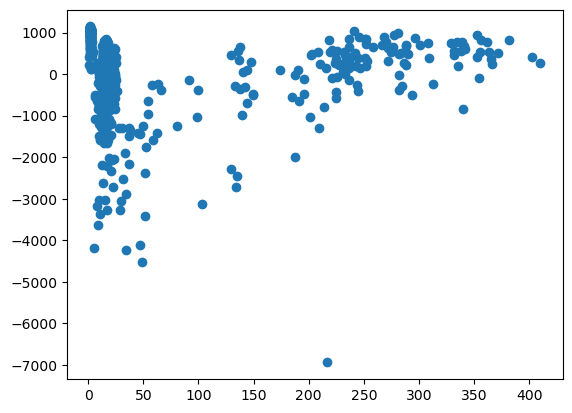

In [114]:
# scatter plot between y_test and y_predicted values
plt.scatter(y_test, y_predicted)
plt.show()

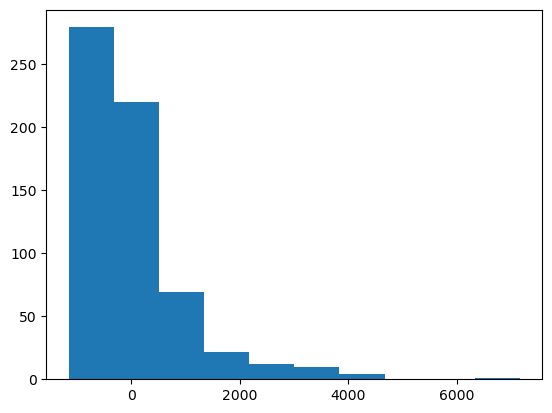

In [115]:
# histogram of y_test - y_predicted values
plt.hist(y_test - y_predicted)
plt.show()

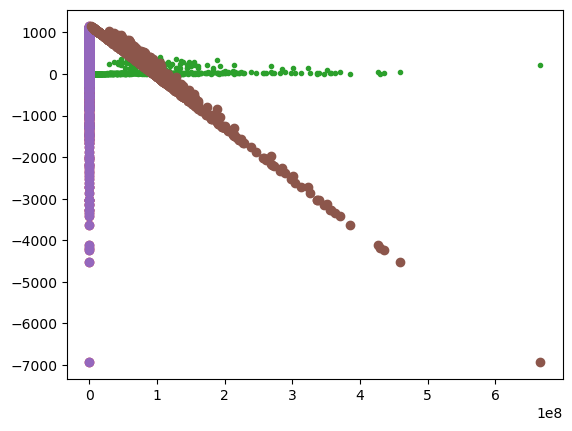

In [116]:
# fit graph for y_test vs y_predicted
plt.plot(X_test, y_test,'.')
plt.plot(X_test, y_predicted,'o')
plt.show()

### 4. Principal Components Regression
It's the same as linear regression but focuses on the principal components for regression instead of everything

#### Evaluate lin_reg for different number of principal components

In [117]:
lin_reg = LinearRegression()
rmse_list = []

In [118]:
# First generate all the principal components
pca = PCA()
X_train_pc = pca.fit_transform(X_train)
X_train_pc.shape

(2467, 3)

In [119]:
# View explained variance ratio for each principal component
pca.explained_variance_ratio_

array([1.00000000e+00, 2.52906786e-12, 9.57923172e-16])

**Explained variance** shows us how much of the variance observed can be attributed to each component

In [120]:
# View all principal components
pd.DataFrame(pca.components_.T)

,0,1,2
0,5.867563e-08,7.074545e-01,7.067589e-01
1,5.980724e-08,7.067589e-01,-7.074545e-01
2,1.000000e+00,-8.377964e-08,8.413779e-10


In [121]:
# Loop through different number of principal components for linear regression
for i in range(1, X_train_pc.shape[1]+1):
    rmse_score = -1 * cross_val_score(lin_reg, 
                                      X_train_pc[:,:i], # Use first k principal components
                                      y_train, 
                                      cv=cross_val, 
                                      scoring='neg_root_mean_squared_error').mean()
    rmse_list.append(rmse_score)#Insert the RMSE score for k principal components

In [122]:
rmse_list

[93.0189565855205, 4.467797324149171, 4.215170907721601]

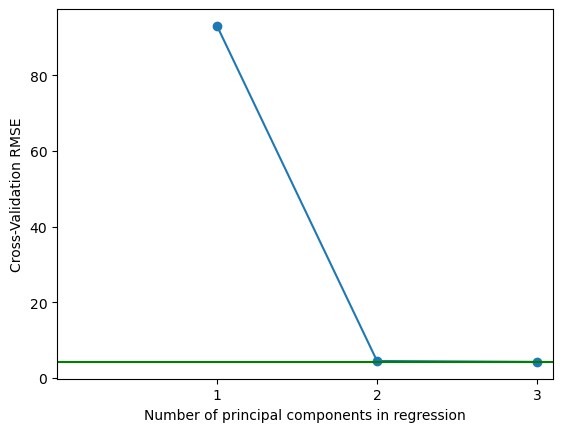

In [123]:
# Plot RMSE vs count of principal components used
plt.plot(rmse_list, '-o')
plt.xlabel('Number of principal components in regression')
plt.ylabel('Cross-Validation RMSE')
plt.xlim(xmin=-1);
plt.xticks(np.arange(X_train_pc.shape[1]), np.arange(1, X_train_pc.shape[1]+1))
plt.axhline(y=lr_score_train, color='g', linestyle='-');

The Blue line represents the RMSE for k components using PCA, while the green line is the RMSE of linear regresion first used

In [124]:
# Visually determine optimal number of principal components
best_pc_num = 3

#### Predict

In [125]:
# Train model on training set
lin_reg_pc = LinearRegression().fit(X_train_pc[:,:best_pc_num], y_train)

In [126]:
# Get R2 score
lin_reg_pc.score(X_train_pc[:,:best_pc_num], y_train)

0.9979555102842111

In [127]:
# get kfold values
pcr_score = -1 * cross_val_score(lin_reg_pc,X_train_pc[:,:best_pc_num],y_train,cv=cross_val,scoring='neg_root_mean_squared_error')
pcr_score

array([3.91318568, 3.83869048, 5.33597337, 4.61909726, 3.88373667,
       4.94811519, 3.66922423, 4.50099276, 3.61600041, 3.82669303])

In [128]:
#Taking mean of kfold values
pcr_score_train = np.mean(pcr_score)
pcr_score_train

4.215170907721601

In [129]:
# Get principal components of test set
X_test_pc = pca.transform(X_test)[:,:best_pc_num]
X_test_pc.shape

(617, 3)

In [130]:
# Predict on test data
preds = lin_reg_pc.predict(X_test_pc)
pcr_score_test = mean_squared_error(y_test, preds, squared=False)
pcr_score_test

4.630059170141333

### 5. RandomForest Regressor
It is a ensemble model that uses multiple stumps for regression

#### Train set cross validation

In [131]:
# defining Random Forest Regressor model and creating its object
rf_reg = RandomForestRegressor()

In [132]:
#Fitting model to training data
rf_reg = rf_reg.fit(X_train, y_train)

In [133]:
#Get R2 score
rf_reg.score(X_train,y_train)

0.9996317843497693

In [134]:
# get kfold values
rf_scores = -1 * cross_val_score(rf_reg,X_train,y_train,cv=cross_val,scoring='neg_root_mean_squared_error')
rf_scores

array([5.09143734, 4.35873499, 5.91255736, 4.92042796, 5.11757382,
       5.74726001, 4.34122251, 4.777168  , 4.42282286, 3.87190721])

In [135]:
#Taking mean of kfold values
rf_score_train = np.mean(rf_scores)
rf_score_train

4.85611120609965

#### Predict

In [136]:
# predict the values on X_test dataset 
y_predicted = rf_reg.predict(X_test)

In [137]:
# RMSE between y_test and y_predicted values
rf_score_test = mean_squared_error(y_test, y_predicted, squared=False)#Settng squared to false to give us RMSE intead of MSE
rf_score_test

5.288757060104931

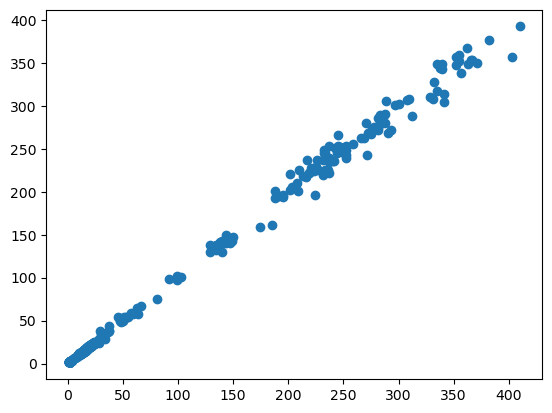

In [138]:
# scatter plot between y_test and y_predicted values
plt.scatter(y_test, y_predicted)
plt.show()

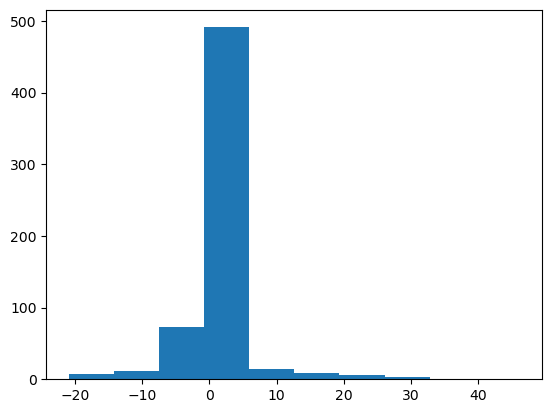

In [139]:
# histogram of y_test - y_predicted values
plt.hist(y_test - y_predicted)
plt.show()

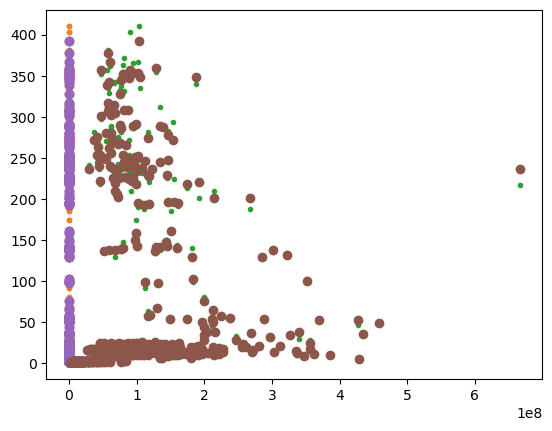

In [140]:
# fit graph for y_test vs y_predicted
plt.plot(X_test, y_test,'.')
plt.plot(X_test, y_predicted,'o')
plt.show()

### 6. K-Neighbour Regressor
It is a K-nearest neighbour based model that is used for regression

#### Train set cross validation

In [141]:
# defining k-neighbour regressor model and creating its object
knn_reg = KNeighborsRegressor(n_neighbors=5,algorithm='auto',leaf_size=20, p=2)

In [142]:
#Fitting model to training data
knn_reg = knn_reg.fit(X_train, y_train)

In [143]:
#Get R2 score
knn_reg.score(X_train,y_train)

0.28948786089422085

In [144]:
# get kfold values
knn_scores = -1 * cross_val_score(knn_reg,X_train,y_train,cv=cross_val,scoring='neg_root_mean_squared_error')
knn_scores

array([ 94.99443656,  94.73045181, 103.54653467, 100.13179837,
       100.86441921,  89.29779664,  97.4475878 ,  93.81809745,
        95.79826445,  92.23743253])

In [145]:
#Taking mean of kfold values
knn_score_train = np.mean(knn_scores)
knn_score_train

96.28668194845618

#### Predict

In [146]:
# predict the values on X_test dataset 
y_predicted = knn_reg.predict(X_test)

In [147]:
# RMSE between y_test and y_predicted values
knn_score_test = mean_squared_error(y_test, y_predicted, squared=False)#Settng squared to false to give us RMSE intead of MSE
knn_score_test

102.1366698929889

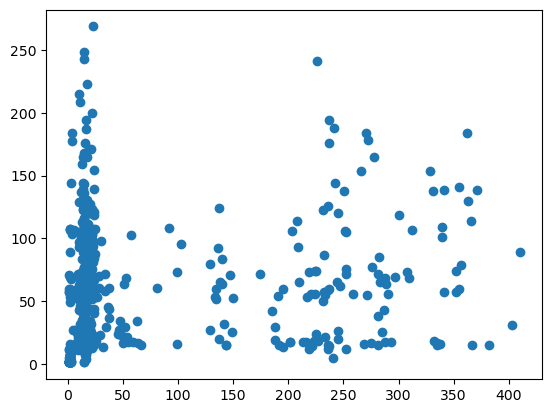

In [148]:
# scatter plot between y_test and y_predicted values
plt.scatter(y_test, y_predicted)
plt.show()

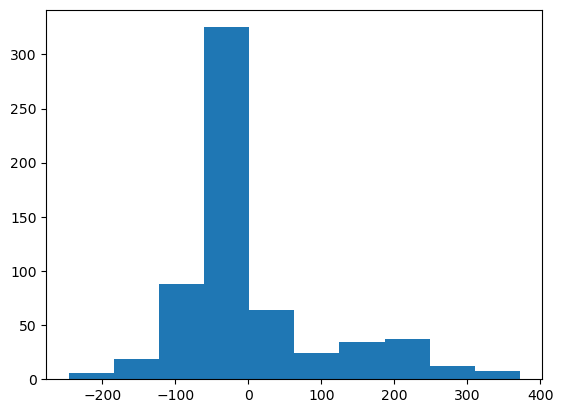

In [149]:
# histogram of y_test - y_predicted values
plt.hist(y_test - y_predicted)
plt.show()

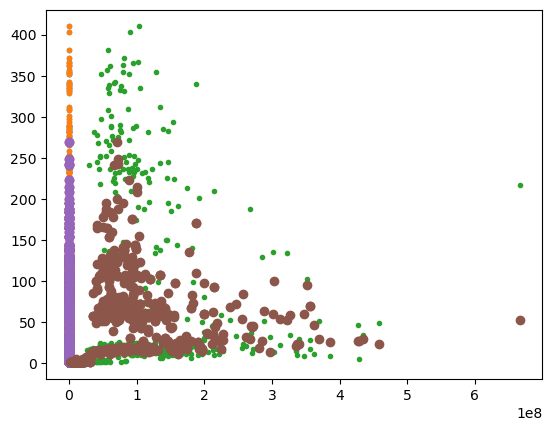

In [150]:
# fit graph for y_test vs y_predicted
plt.plot(X_test, y_test,'.')
plt.plot(X_test, y_predicted,'o')
plt.show()

### 7. XGBRegressor
Its is a model that uses Extreme Gradiant Boosting to improve accuracy

#### Train set cross validation

In [151]:
# defining XGBRegressor model and creating its object
xgbr_reg = XGBRegressor()

In [152]:
#Fitting model to training data
xgbr_reg = xgbr_reg.fit(X_train, y_train)

/mnt/f6949ea6-23f5-4c75-bca3-14668f4f4d8f/zed/DS/conda/envs/learn/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [153]:
#Get R2 score
xgbr_reg.score(X_train,y_train)

0.9999668063144473

In [154]:
# get kfold values
xgbr_scores = -1 * cross_val_score(xgbr_reg,X_train,y_train,cv=cross_val,scoring='neg_root_mean_squared_error')
xgbr_scores

/mnt/f6949ea6-23f5-4c75-bca3-14668f4f4d8f/zed/DS/conda/envs/learn/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/mnt/f6949ea6-23f5-4c75-bca3-14668f4f4d8f/zed/DS/conda/envs/learn/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/mnt/f6949ea6-23f5-4c75-bca3-14668f4f4d8f/zed/DS/conda/envs/learn/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/

array([5.86924352, 4.71278386, 6.62459209, 6.05013177, 5.86554021,
       5.51143192, 4.11515916, 5.2528964 , 5.09601   , 4.34747852])

In [155]:
#Taking mean of kfold values
xgbr_score_train = np.mean(xgbr_scores)
xgbr_score_train

5.34452674609408

#### Predict

In [156]:
# predict the values on X_test dataset 
y_predicted = xgbr_reg.predict(X_test)

In [157]:
# RMSE between y_test and y_predicted values
xgbr_score_test = mean_squared_error(y_test, y_predicted, squared=False)#Settng squared to false to give us RMSE intead of MSE
xgbr_score_test

5.306074346655003

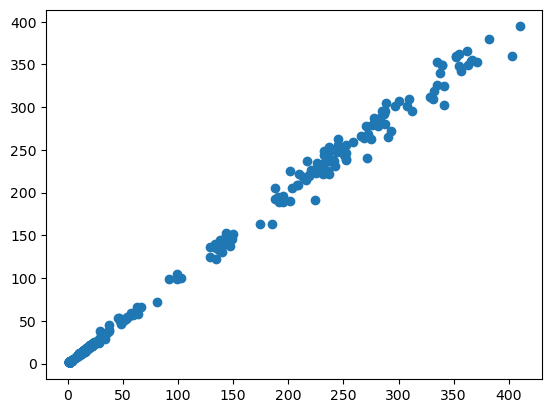

In [158]:
# scatter plot between y_test and y_predicted values
plt.scatter(y_test, y_predicted)
plt.show()

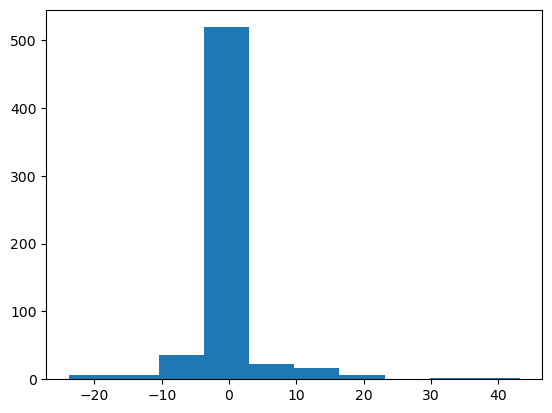

In [159]:
# histogram of y_test - y_predicted values
plt.hist(y_test - y_predicted)
plt.show()

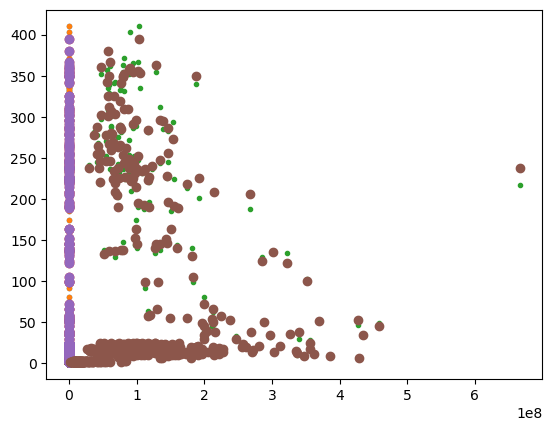

In [160]:
# fit graph for y_test vs y_predicted
plt.plot(X_test, y_test,'.')
plt.plot(X_test, y_predicted,'o')
plt.show()

### Evaluation

In [161]:
train_metrics = np.array([
                        round(lr_score_train,3),
                        round(lasso_score_train,3),
                        round(ridge_score_train,3), 
                        round(pcr_score_train,3),
                        round(rf_score_train,3),
                        round(knn_score_train,3),
                        round(xgbr_score_train,3)
]) 
train_metrics = pd.DataFrame(train_metrics, columns=['RMSE (Train Set)'])
train_metrics.index = [
                        'Linear Regression',
                        'Lasso Regression', 
                        'Ridge Regression', 
                        f'PCR ({best_pc_num} components)',
                        'RandomForestRegressor',
                        'KNeighborsRegressor',
                        'XGBRegressor'
]
train_metrics

,RMSE (Train Set)
Linear Regression,4.215
Lasso Regression,93.019
Ridge Regression,2269.777
PCR (3 components),4.215
RandomForestRegressor,4.856
KNeighborsRegressor,96.287
XGBRegressor,5.345


In [162]:
test_metrics = np.array([
                        round(lr_score_test,3), 
                        round(lasso_score_test,3), 
                        round(ridge_score_test,3), 
                        round(pcr_score_test,3),
                        round(rf_score_test,3),
                        round(knn_score_test,3),
                        round(xgbr_score_test,3)

]) 
test_metrics = pd.DataFrame(test_metrics, columns=['RMSE (Test Set)'])
test_metrics.index = [
                        'Linear Regression',
                        'Lasso Regression', 
                        'Ridge Regression', 
                        f'PCR ({best_pc_num} components)',
                        'RandomForestRegressor',
                        'KNeighborsRegressor',
                        'XGBRegressor'
]
test_metrics

,RMSE (Test Set)
Linear Regression,4.630
Lasso Regression,99.160
Ridge Regression,988.973
PCR (3 components),4.630
RandomForestRegressor,5.289
KNeighborsRegressor,102.137
XGBRegressor,5.306


### Step 3 Insights/Results/Summary:- 
It is clear that Linear regression will be the best model for our dataset and the columns that we have selected for training are the best as they give the most accurate answer in PCA.

## Step 4: Save Model

#### Goal:- In this step we are going to save our model in pickel format file.

In [163]:
#Saving model in pkl format using pickle library
import pickle
pickle.dump(lr, open('./model/TSLA_stock_prediction.pkl', 'wb'))

In [173]:
#Function to take model and feature value as input and returning predicted target
def model_prediction(features, model):
    
    pickled_model = pickle.load(open(model, 'rb'))
    stock_price = float(pickled_model.predict(features))
    
    return stock_price

#### Checking the predictions

In [174]:
#Making prediction
model_prediction(X_test.iloc[1:2,:],'./model/TSLA_stock_prediction.pkl')

17.4148866538698

In [168]:
#Actual value
y_test.iloc[1:2]

Date
2019-07-23    17.658667
Name: Target, dtype: float64